In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
ㄴ
df = pd.read_csv('/content/drive/MyDrive/Bitcoin_tweets.csv', low_memory=False, nrows=10000000)

In [ ]:
df = df.dropna(subset=['date'])

In [ ]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585250,CryptoToGo.de,Earth,"independent, neutral & latest up to date news ...",2022-12-21 13:05:47,8,9,1,False,2022-12-27 23:58:29,ECB to Decide Whether to Issue Digital Euro in...,"['Ethereum', 'bitcoin']",Twitter for iPhone,False
4585251,V1ls0n PsycoBuilder🍌🍞🏬⚡🍄🍷 KavanhaK SystemS,Florianópolis Brazil.,"*Online since 1997,\nAKA l0g4N, Sap∅, Tecuryu ...",2009-05-08 13:05:06,2094,2758,21950,False,2022-12-27 23:58:19,What was the biggest #bitcoin controversy of 2...,['bitcoin'],Twitter for Android,False
4585252,CozyCryptoCats 🍊💊🎮,NaN,Building a #Bitcoin centric Gaming DAO 🔑⚡️,2022-08-29 08:12:31,2993,631,4387,False,2022-12-27 23:58:05,#Bitcoin is too big to fail from not becoming ...,['Bitcoin'],Twitter for iPhone,False
4585253,PogueThePatriot,Not of this world,"“He must become greater, I must become less.” ...",2020-04-12 21:09:18,135,263,859,False,2022-12-27 23:58:03,"My dad 5 years ago: “Son, what’s the price of ...","['Bitcoin', 'Bitcoin']",Twitter for iPhone,False


In [ ]:
df.isnull().sum()

,0
user_name,110
user_location,2282727
user_description,512039
user_created,0
user_followers,0
user_friends,0
user_favourites,0
user_verified,0
date,0
text,0


In [ ]:
df = df.drop(['user_location', 'user_description', 'hashtags', 'source'], axis=1)

df
df.isnull().sum()

,0
user_name,110
user_created,0
user_followers,0
user_friends,0
user_favourites,0
user_verified,0
date,0
text,0
is_retweet,819


In [ ]:
df['user_name'] = df['user_name'].fillna('anonymous')
df['is_retweet'] = df['is_retweet'].fillna(False)

df

<ipython-input-7-44bc1d2a50f2>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_retweet'] = df['is_retweet'].fillna(False)


,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
0,DeSota Wilson,2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,False
1,CryptoND,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",False
2,Tdlmatias,2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",False
3,Crypto is the future,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,False
...,...,...,...,...,...,...,...,...,...
4585250,CryptoToGo.de,2022-12-21 13:05:47,8,9,1,False,2022-12-27 23:58:29,ECB to Decide Whether to Issue Digital Euro in...,False
4585251,V1ls0n PsycoBuilder🍌🍞🏬⚡🍄🍷 KavanhaK SystemS,2009-05-08 13:05:06,2094,2758,21950,False,2022-12-27 23:58:19,What was the biggest #bitcoin controversy of 2...,False
4585252,CozyCryptoCats 🍊💊🎮,2022-08-29 08:12:31,2993,631,4387,False,2022-12-27 23:58:05,#Bitcoin is too big to fail from not becoming ...,False
4585253,PogueThePatriot,2020-04-12 21:09:18,135,263,859,False,2022-12-27 23:58:03,"My dad 5 years ago: “Son, what’s the price of ...",False


In [ ]:
df.shape

(4585255, 9)

In [ ]:
# 날짜 형식 추정 (YYYY-MM-DD 또는 비슷한 형식)
import re

def is_date(value):
    if isinstance(value, str):
        return bool(re.match(r'^\d{4}-\d{2}-\d{2}', value))  # YYYY-MM-DD 패턴
    return False

# 날짜 형식이 아닌 값 제거
df = df[df['date'].apply(is_date)]

df.shape

(4585189, 9)

In [ ]:
# 날짜로 변환
df['date'] = pd.to_datetime(df['date'])

# 결과 확인
df.head()

<ipython-input-10-1afb1a90f6fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
0,DeSota Wilson,2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,False
1,CryptoND,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",False
2,Tdlmatias,2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",False
3,Crypto is the future,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,False


In [ ]:
df.tail()

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
4585250,CryptoToGo.de,2022-12-21 13:05:47,8,9,1,False,2022-12-27 23:58:29,ECB to Decide Whether to Issue Digital Euro in...,False
4585251,V1ls0n PsycoBuilder🍌🍞🏬⚡🍄🍷 KavanhaK SystemS,2009-05-08 13:05:06,2094,2758,21950,False,2022-12-27 23:58:19,What was the biggest #bitcoin controversy of 2...,False
4585252,CozyCryptoCats 🍊💊🎮,2022-08-29 08:12:31,2993,631,4387,False,2022-12-27 23:58:05,#Bitcoin is too big to fail from not becoming ...,False
4585253,PogueThePatriot,2020-04-12 21:09:18,135,263,859,False,2022-12-27 23:58:03,"My dad 5 years ago: “Son, what’s the price of ...",False
4585254,Crypto Frog,2022-08-03 13:08:37,713,5,4,False,2022-12-27 23:57:49,Top 5 #cryptocurrency #price jumps in last min...,False


In [ ]:
df.sort_values(by='date', inplace=True)
df

<ipython-input-12-51c74b9a78a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='date', inplace=True)


,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
21523,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,False
21524,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,False
21522,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,False
21521,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",False
21520,Nick Doevendans,2020-06-12 16:50:07,37.0,123,410,False,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,False
...,...,...,...,...,...,...,...,...,...
4585238,Ethereum Yoda,2022-07-24 04:50:18,498,1,0,False,2022-12-27 23:59:34,#Ethereum price update: \n\n#ETH $1211.17 USD\...,False
4585237,BNB Price Tracker,2022-07-11 05:24:30,399,5,0,False,2022-12-27 23:59:38,#BinanceCoin price update: $BNB\n\n#BNB $246.5...,False
4585236,Wee Blue Ghost,2020-10-17 08:24:46,394,81,79,False,2022-12-27 23:59:40,"- \nBTC price: $16,699 / £13,953 \n\n59.88 Nak...",False
4585235,John Morgan,2013-12-08 02:06:19,28228,578,112,False,2022-12-27 23:59:44,#Bitcoin Mining Firms Lost About $4 Billion in...,False


In [ ]:
df = df.dropna(subset=['date'])
df.tail(5)

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
4585238,Ethereum Yoda,2022-07-24 04:50:18,498,1,0,False,2022-12-27 23:59:34,#Ethereum price update: \n\n#ETH $1211.17 USD\...,False
4585237,BNB Price Tracker,2022-07-11 05:24:30,399,5,0,False,2022-12-27 23:59:38,#BinanceCoin price update: $BNB\n\n#BNB $246.5...,False
4585236,Wee Blue Ghost,2020-10-17 08:24:46,394,81,79,False,2022-12-27 23:59:40,"- \nBTC price: $16,699 / £13,953 \n\n59.88 Nak...",False
4585235,John Morgan,2013-12-08 02:06:19,28228,578,112,False,2022-12-27 23:59:44,#Bitcoin Mining Firms Lost About $4 Billion in...,False
4585234,Bitcoin News Post,2020-12-03 22:17:57,228,70,14,False,2022-12-27 23:59:59,Why TRX Could Outperform BTC and ETH #Bitcoin ...,False


In [ ]:
from tqdm import tqdm
import re

# tqdm 설정
tqdm.pandas(desc="Processing text data")

def clean_text(text):
    """
    주어진 텍스트에서 특정 패턴(해시태그, URL, 멘션 등)을 제거하고 정리합니다.

    Args:
        text (str): 전처리할 텍스트 데이터

    Returns:
        str: 전처리된 텍스트
    """
    if not isinstance(text, str):
        return ""

    # 해시태그 기호 제거
    text = text.replace("#", "")

    # URL 패턴 제거
    text = re.sub(r"http\S+|www\S+", "", text)

    # 멘션(@username) 제거
    text = re.sub(r"@\w+", "", text)

    # 추가적인 공백 제거
    return text.strip()

# 데이터프레임의 텍스트 열 전처리
print("Cleaning text data...")
if 'text' in df.columns:
    df['cleaned_text'] = df['text'].progress_apply(clean_text)
else:
    print("Error: 'text' column not found in the dataframe.")

# 결과 확인
df

Cleaning text data...


Processing text data: 100%|██████████| 4585189/4585189 [00:27<00:00, 168794.56it/s]


,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet,cleaned_text
21523,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,False,2⃣ Debunking 9 Bitcoin Myths by ⬇️ \n\ncr...
21524,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,False,📖 Weekend Read 📖\n\nKeen to learn about crypt...
21522,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,False,4⃣ 🎙️ Bloomberg LP CryptoOutlook 2021 with ⬇...
21521,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",False,"5⃣ Blockchain 50 2021 by , , ⬇️\n\ncrypto..."
21520,Nick Doevendans,2020-06-12 16:50:07,37.0,123,410,False,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,False,reddcoin rdd to the moon altcoin turnreddcoin...
...,...,...,...,...,...,...,...,...,...,...
4585238,Ethereum Yoda,2022-07-24 04:50:18,498,1,0,False,2022-12-27 23:59:34,#Ethereum price update: \n\n#ETH $1211.17 USD\...,False,Ethereum price update: \n\nETH $1211.17 USD\nB...
4585237,BNB Price Tracker,2022-07-11 05:24:30,399,5,0,False,2022-12-27 23:59:38,#BinanceCoin price update: $BNB\n\n#BNB $246.5...,False,BinanceCoin price update: $BNB\n\nBNB $246.52 ...
4585236,Wee Blue Ghost,2020-10-17 08:24:46,394,81,79,False,2022-12-27 23:59:40,"- \nBTC price: $16,699 / £13,953 \n\n59.88 Nak...",False,"- \nBTC price: $16,699 / £13,953 \n\n59.88 Nak..."
4585235,John Morgan,2013-12-08 02:06:19,28228,578,112,False,2022-12-27 23:59:44,#Bitcoin Mining Firms Lost About $4 Billion in...,False,Bitcoin Mining Firms Lost About $4 Billion in ...


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# tqdm 설정
tqdm.pandas(desc="Analyzing Sentiment")

# SentimentIntensityAnalyzer 초기화
sentiment_analyzer = SentimentIntensityAnalyzer()

def compute_sentiment_score(text):
    """
    주어진 텍스트의 감정 점수를 계산합니다.

    Args:
        text (str): 감정 점수를 계산할 텍스트 데이터

    Returns:
        float: 감정 점수 (compound 값)
    """
    if not isinstance(text, str):
        return 0.0  # 문자열이 아닌 경우 기본값으로 0.0 반환

    sentiment = sentiment_analyzer.polarity_scores(text)
    return sentiment.get('compound', 0.0)

# 데이터프레임에 감정 점수 열 추가
print("Calculating sentiment scores...")
if 'cleaned_text' in df.columns:
    df['sentiment_score'] = df['cleaned_text'].progress_apply(compute_sentiment_score)
else:
    print("Error: 'cleaned_text' column not found in the dataframe.")

# 결과 확인
df.head()

Calculating sentiment scores...


Analyzing Sentiment: 100%|██████████| 4585189/4585189 [10:16<00:00, 7440.67it/s]


,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet,cleaned_text,sentiment_score
21523,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,False,2⃣ Debunking 9 Bitcoin Myths by ⬇️ \n\ncr...,0.0000
21524,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,False,📖 Weekend Read 📖\n\nKeen to learn about crypt...,0.5411
21522,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,False,4⃣ 🎙️ Bloomberg LP CryptoOutlook 2021 with ⬇...,0.0000
21521,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",False,"5⃣ Blockchain 50 2021 by , , ⬇️\n\ncrypto...",0.0000
21520,Nick Doevendans,2020-06-12 16:50:07,37.0,123,410,False,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,False,reddcoin rdd to the moon altcoin turnreddcoin...,0.0000


In [ ]:
print(df['sentiment_score'].isnull().sum())
print(df['user_followers'].isnull().sum())
print(df['is_retweet'].isnull().sum())

0
0
0


In [ ]:
# 데이터 타입 확인
print(df.dtypes)

user_name                  object
user_created               object
user_followers             object
user_friends               object
user_favourites            object
user_verified              object
date               datetime64[ns]
text                       object
is_retweet                   bool
cleaned_text               object
sentiment_score           float64
dtype: object


In [ ]:
# 소수점이 포함된 값 처리
df['user_followers'] = pd.to_numeric(df['user_followers'], errors='coerce').fillna(0).astype(int)
df['user_favourites'] = pd.to_numeric(df['user_favourites'], errors='coerce').fillna(0).astype(int)

# 불리언 값 변환
df['is_retweet'] = df['is_retweet'].astype(int)

In [ ]:
import numpy as np

# tqdm 설정 활성화
tqdm.pandas(desc="Calculating revised weighted scores")

# 점수 계산 함수 정의
def compute_weighted_score(row):
    """
    가중 점수를 계산하는 함수로, 팔로워 수, 좋아요, 리트윗 여부, 감정 점수를 고려합니다.

    Args:
        row (pd.Series): 데이터프레임의 한 행

    Returns:
        float: 계산된 점수
    """
    try:
        # 각 항목 값 가져오기
        followers = int(row.get("user_followers", 0))
        favourites = int(row.get("user_favourites", 0))
        is_retweet = int(row.get("is_retweet", 0))
        sentiment = row.get("sentiment_score", 0)

        # 개선된 점수 계산식
        score = (sentiment * np.log1p(followers + 1)) * ((favourites + 1) ** 0.5) * (1.5 if is_retweet else 1)
        return round(score, 4)
    except Exception as e:
        return np.nan

# 점수 계산 및 열 추가
print("Calculating revised scores...")
df["score"] = df.progress_apply(compute_weighted_score, axis=1)

# 결과 확인
df.tail()

Calculating revised scores...


Calculating revised weighted scores: 100%|██████████| 4585189/4585189 [02:05<00:00, 36600.47it/s]


,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet,cleaned_text,sentiment_score,score
4585238,Ethereum Yoda,2022-07-24 04:50:18,498,1,0,False,2022-12-27 23:59:34,#Ethereum price update: \n\n#ETH $1211.17 USD\...,0,Ethereum price update: \n\nETH $1211.17 USD\nB...,0.0000,0.0000
4585237,BNB Price Tracker,2022-07-11 05:24:30,399,5,0,False,2022-12-27 23:59:38,#BinanceCoin price update: $BNB\n\n#BNB $246.5...,0,BinanceCoin price update: $BNB\n\nBNB $246.52 ...,0.0000,0.0000
4585236,Wee Blue Ghost,2020-10-17 08:24:46,394,81,79,False,2022-12-27 23:59:40,"- \nBTC price: $16,699 / £13,953 \n\n59.88 Nak...",0,"- \nBTC price: $16,699 / £13,953 \n\n59.88 Nak...",0.0000,0.0000
4585235,John Morgan,2013-12-08 02:06:19,28228,578,112,False,2022-12-27 23:59:44,#Bitcoin Mining Firms Lost About $4 Billion in...,0,Bitcoin Mining Firms Lost About $4 Billion in ...,-0.3182,-34.6645
4585234,Bitcoin News Post,2020-12-03 22:17:57,228,70,14,False,2022-12-27 23:59:59,Why TRX Could Outperform BTC and ETH #Bitcoin ...,0,Why TRX Could Outperform BTC and ETH Bitcoin N...,0.0000,0.0000


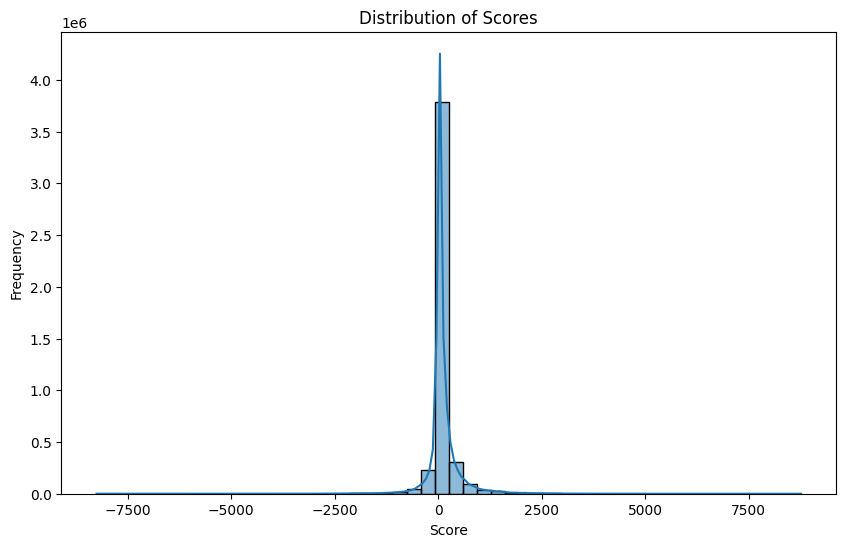

count    4.585189e+06
mean     7.145791e+01
std      3.151241e+02
min     -8.255543e+03
25%      0.000000e+00
50%      1.902900e+00
75%      7.741510e+01
max      8.768489e+03
Name: score, dtype: float64


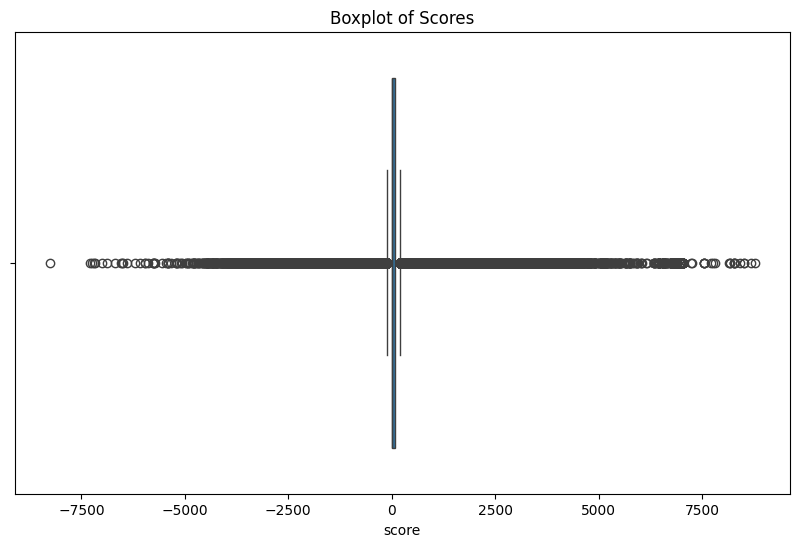

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Score 분포 확인 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=50, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Score 분포 확인 (describe)
print(df['score'].describe())

# Score의 이상치 확인 (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['score'])
plt.title('Boxplot of Scores')
plt.show()

In [ ]:
df['score'].isnull().sum()

0

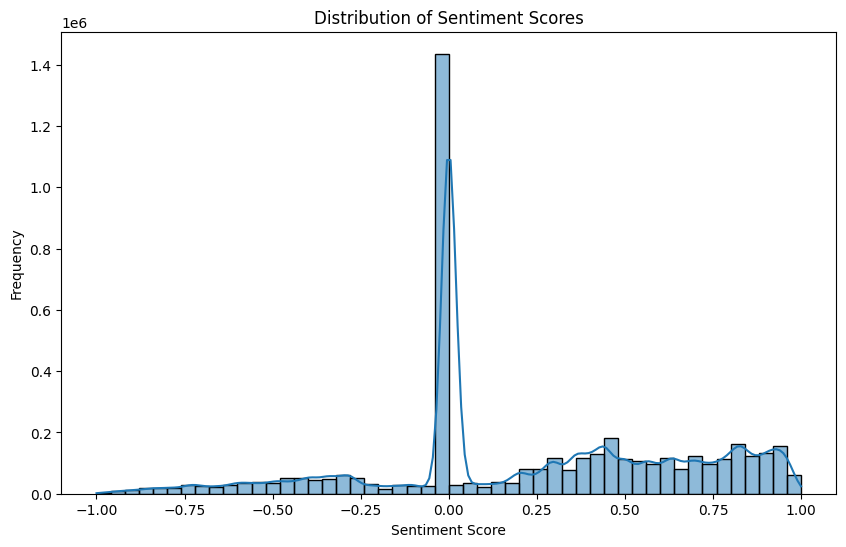

count    4.585189e+06
mean     2.359547e-01
std      4.412133e-01
min     -9.998000e-01
25%      0.000000e+00
50%      1.779000e-01
75%      6.124000e-01
max      1.000000e+00
Name: sentiment_score, dtype: float64


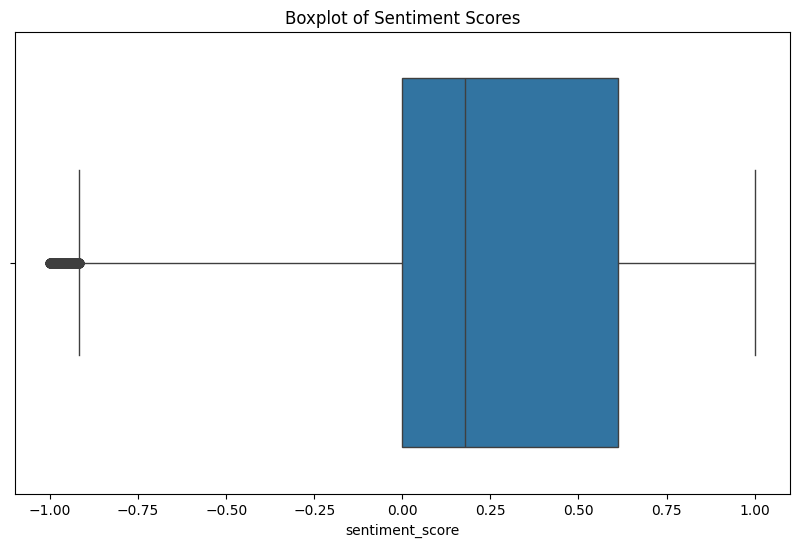

In [ ]:
# Score 분포 확인 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Score 분포 확인 (describe)
print(df['sentiment_score'].describe())

# Score의 이상치 확인 (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sentiment_score'])
plt.title('Boxplot of Sentiment Scores')
plt.show()

In [ ]:
df.head()

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet,cleaned_text,sentiment_score,score
21523,Iconic Holding,2021-01-05 13:22:24,301,1075,361,False,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,0,2⃣ Debunking 9 Bitcoin Myths by ⬇️ \n\ncr...,0.0000,0.0000
21524,Iconic Holding,2021-01-05 13:22:24,301,1075,361,False,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,0,📖 Weekend Read 📖\n\nKeen to learn about crypt...,0.5411,58.8236
21522,Iconic Holding,2021-01-05 13:22:24,301,1075,361,False,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,0,4⃣ 🎙️ Bloomberg LP CryptoOutlook 2021 with ⬇...,0.0000,0.0000
21521,Iconic Holding,2021-01-05 13:22:24,301,1075,361,False,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",0,"5⃣ Blockchain 50 2021 by , , ⬇️\n\ncrypto...",0.0000,0.0000
21520,Nick Doevendans,2020-06-12 16:50:07,37,123,410,False,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,0,reddcoin rdd to the moon altcoin turnreddcoin...,0.0000,0.0000


In [ ]:
bitcoin_price = pd.read_csv('/content/drive/MyDrive/기계학습 2조/1. 이전 데이터 분석 모음/Bitcoin prediction/비트코인 데이터셋/BTC-USD (2014-2024).csv')

bitcoin_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07
...,...,...,...,...,...,...,...
3408,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,2.085123e+10
3409,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,2.521836e+10
3410,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,2.575241e+10
3411,2024-01-20,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bitcoin_price['Date'] = pd.to_datetime(bitcoin_price['Date'])
bitcoin_price = bitcoin_price[['Date', 'Close']]

In [ ]:
bitcoin_price

,Date,Close
0,2014-09-18,424.440002
1,2014-09-19,394.795990
2,2014-09-20,408.903992
3,2014-09-21,398.821014
4,2014-09-22,402.152008
...,...,...
3408,2024-01-17,42742.652344
3409,2024-01-18,41262.058594
3410,2024-01-19,41618.406250
3411,2024-01-20,NaN


In [ ]:
bitcoin_price.isnull().sum()

,0
Date,0
Close,1


In [ ]:
bitcoin_price.dropna(inplace=True)
bitcoin_price

<ipython-input-36-510da4a9f8fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_price.dropna(inplace=True)


,Date,Close
0,2014-09-18,424.440002
1,2014-09-19,394.795990
2,2014-09-20,408.903992
3,2014-09-21,398.821014
4,2014-09-22,402.152008
...,...,...
3407,2024-01-16,43154.945313
3408,2024-01-17,42742.652344
3409,2024-01-18,41262.058594
3410,2024-01-19,41618.406250


In [ ]:
import pandas as pd

# 중복 데이터 제거
df_cleaned = df.drop_duplicates()

# 트윗 데이터 처리
tweets_data = df_cleaned.copy()
tweets_data['date'] = pd.to_datetime(tweets_data['date'], utc=True).dt.tz_localize(None)  # UTC 변환 후 지역화 해제
tweets_data = tweets_data.set_index('date')  # 날짜를 인덱스로 설정

# 트윗 데이터 1시간 단위 집계
tweets_hourly = tweets_data.resample('1H').sum()  # 1시간 단위로 합계 계산

# 비트코인 가격 데이터 처리
crypto_prices = bitcoin_price.copy()
crypto_prices['Date'] = pd.to_datetime(crypto_prices['Date'])  # 날짜를 datetime 형식으로 변환
crypto_prices = crypto_prices.set_index('Date')  # 날짜를 인덱스로 설정

# 비트코인 가격 데이터 일 단위 평균 계산
crypto_daily_avg = crypto_prices.resample('D')['Close'].mean()  # 일 단위 평균 가격 계산

# 결과 확인
print("Tweets (Hourly Grouped):")
print(tweets_hourly.head())

print("\nCrypto Prices (Daily Average):")
print(crypto_daily_avg.head())

<ipython-input-37-172f84af3775>:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tweets_hourly = tweets_data.resample('1H').sum()  # 1시간 단위로 합계 계산


Tweets (Hourly Grouped):
                                                             user_name  \
date                                                                     
2021-02-05 10:00:00  Iconic HoldingIconic HoldingIconic HoldingIcon...   
2021-02-05 11:00:00  Crypto TraderCoinstatsKur Kaç Oldu?Kur Ne Oldu...   
2021-02-05 12:00:00  Crypto TraderKur Kaç Oldu?Kur Ne OlduCryptoIns...   
2021-02-05 13:00:00  ClankApp - Crypto Whales Tracker 🐳hgvtradeGLOB...   
2021-02-05 14:00:00  Crypto TraderKur Ne OlduKur Kaç Oldu?Crypto Tr...   

                                                          user_created  \
date                                                                     
2021-02-05 10:00:00  2021-01-05 13:22:242021-01-05 13:22:242021-01-...   
2021-02-05 11:00:00  2017-09-09 04:26:152016-04-30 15:47:582016-08-...   
2021-02-05 12:00:00  2017-09-09 04:26:152016-08-14 08:28:422019-02-...   
2021-02-05 13:00:00  2019-04-19 16:31:362020-03-27 06:44:382017-09-...   
2021-02-05 1

In [ ]:
tweets_hourly

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,is_retweet,cleaned_text,sentiment_score,score
date,,,,,,,,,,,
2021-02-05 10:00:00,Iconic HoldingIconic HoldingIconic HoldingIcon...,2021-01-05 13:22:242021-01-05 13:22:242021-01-...,21675,10751075107510751233885228810850224,78957,FalseFalseFalseFalseFalseFalseFalseFalseFalseF...,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,0,2⃣ Debunking 9 Bitcoin Myths by ⬇️ \n\ncr...,3.4982,1478.7064
2021-02-05 11:00:00,Crypto TraderCoinstatsKur Kaç Oldu?Kur Ne Oldu...,2017-09-09 04:26:152016-04-30 15:47:582016-08-...,634191,1610176818818818818333716981324582441338060214...,304686,FalseFalseFalseFalseFalseFalseFalseFalseFalseF...,"Bitcoin: $37,412.78\n -0.46% (-$174.48)\nHigh:...",0,"Bitcoin: $37,412.78\n -0.46% (-$174.48)\nHigh:...",9.6646,2653.8077
2021-02-05 12:00:00,Crypto TraderKur Kaç Oldu?Kur Ne OlduCryptoIns...,2017-09-09 04:26:152016-08-14 08:28:422019-02-...,646404,1611761410760411293337101236210122171381340630...,586447,FalseFalseFalseFalseFalseFalseFalseFalseFalseF...,"Bitcoin: $37,681.21\n +1.25% (+$465.30)\nHigh:...",0,"Bitcoin: $37,681.21\n +1.25% (+$465.30)\nHigh:...",31.0263,8427.6896
2021-02-05 13:00:00,ClankApp - Crypto Whales Tracker 🐳hgvtradeGLOB...,2019-04-19 16:31:362020-03-27 06:44:382017-09-...,506222,3641611760367169933371551694152385664665681315...,1071161,FalseFalseFalseFalseFalseFalseFalseFalseFalseF...,"💵2,250 #BTC (82,901,200 USD) move from multipl...",0,"💵2,250 BTC (82,901,200 USD) move from multiple...",15.4473,6271.6943
2021-02-05 14:00:00,Crypto TraderKur Ne OlduKur Kaç Oldu?Crypto Tr...,2017-09-09 04:26:152019-02-11 08:43:212016-08-...,511865,1617611610340134014821885361318192500333713946...,825921,FalseFalseFalseFalseFalseFalseFalseFalseFalseF...,"Bitcoin: $38,251.50\n +1.86% (+$699.33)\nHigh:...",0,"Bitcoin: $38,251.50\n +1.86% (+$699.33)\nHigh:...",23.7339,8628.4187
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 19:00:00,0,0,0,0,0,0,0,0,0,0.0000,0.0000
2022-12-27 20:00:00,0,0,0,0,0,0,0,0,0,0.0000,0.0000
2022-12-27 21:00:00,0,0,0,0,0,0,0,0,0,0.0000,0.0000


In [ ]:
crypto_daily_avg

,Close
Date,
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
2014-09-22,402.152008
...,...
2024-01-17,42742.652344
2024-01-18,41262.058594
2024-01-19,41618.406250


In [ ]:
crypto_daily_avg = crypto_daily_avg.to_frame()
crypto_daily_avg.dropna(subset=['Close'], inplace=True)


In [ ]:
crypto_daily_avg

,Close
Date,
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
2014-09-22,402.152008
...,...
2024-01-16,43154.945313
2024-01-17,42742.652344
2024-01-18,41262.058594


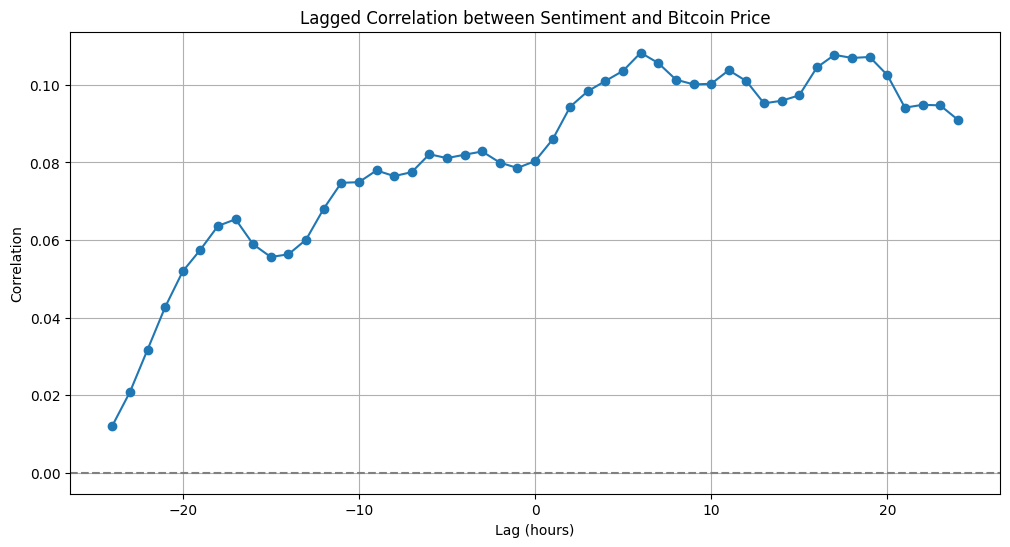

In [ ]:
# tweets_hourly와 crypto_daily_avg의 공통 시간 축으로 맞추기
common_index = tweets_hourly.index.intersection(crypto_daily_avg.index)

# 공통 시간 축 기반으로 데이터 슬라이싱
tweets_hourly_aligned = tweets_hourly.reindex(common_index)
crypto_daily_aligned = crypto_daily_avg.reindex(common_index)

# 시간차 상관관계 계산
lag_values = range(-24, 25)  # -24시간부터 +24시간까지
correlations = []

for lag in lag_values:
    shifted_sentiment = tweets_hourly_aligned['sentiment_score'].shift(lag)
    corr = shifted_sentiment.corr(crypto_daily_aligned['Close'])
    correlations.append(corr)

# 시간차 상관관계 시각화
plt.figure(figsize=(12, 6))
plt.plot(lag_values, correlations, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Lagged Correlation between Sentiment and Bitcoin Price')
plt.xlabel('Lag (hours)')
plt.ylabel('Correlation')
plt.grid()
plt.show()


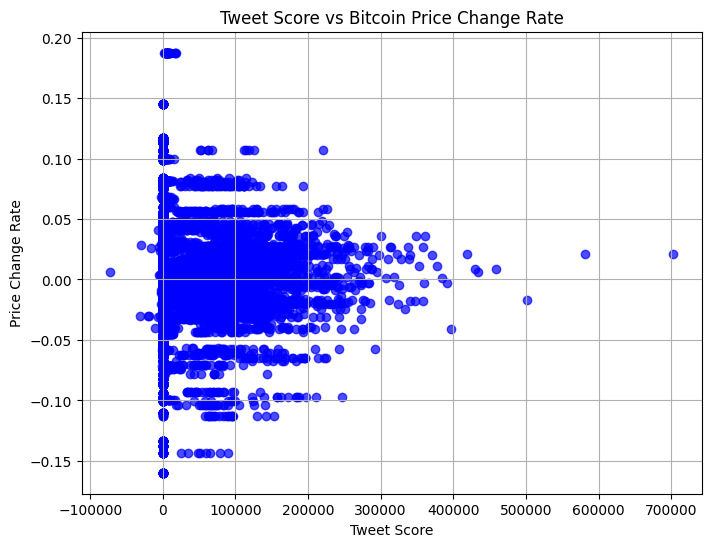

In [ ]:
# 비트코인 가격 변화율 계산
crypto_daily_avg['price_change'] = crypto_daily_avg.pct_change()

# 산점도
plt.figure(figsize=(8, 6))
plt.scatter(tweets_hourly['score'],
            crypto_daily_avg['price_change'].reindex(tweets_hourly.index, method='nearest'),
            alpha=0.7, color='blue')
plt.title('Tweet Score vs Bitcoin Price Change Rate')
plt.xlabel('Tweet Score')
plt.ylabel('Price Change Rate')
plt.grid()
plt.show()

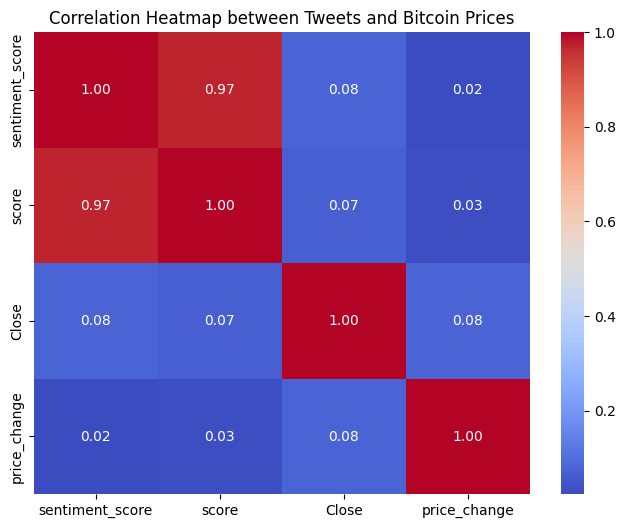

In [ ]:
# 데이터 결합
combined_data = pd.merge(tweets_hourly, crypto_daily_avg, left_index=True, right_index=True, how='inner')

# 상관관계 계산
correlation_matrix = combined_data[['sentiment_score', 'score', 'Close', 'price_change']].corr()

# 히트맵 시각화
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Tweets and Bitcoin Prices')
plt.show()


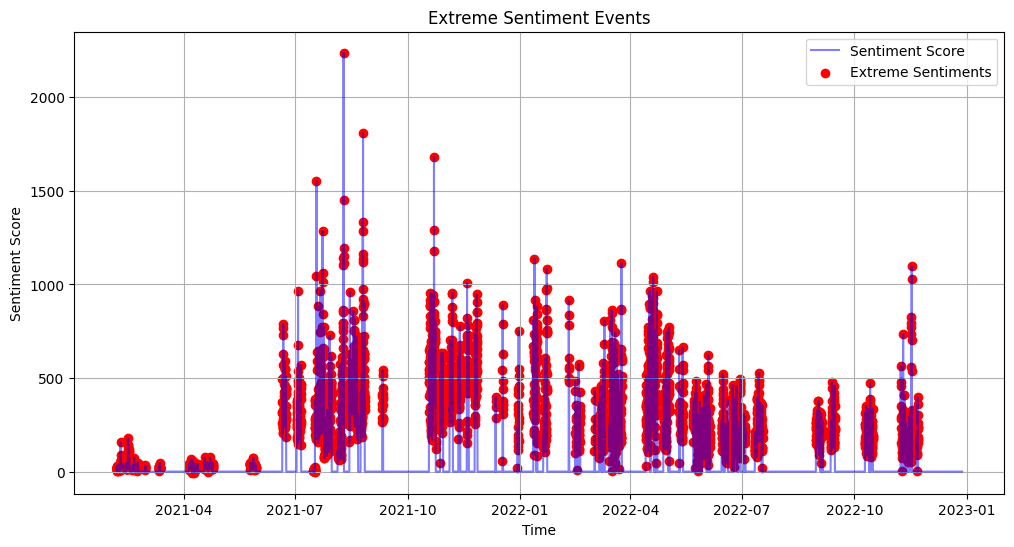

In [ ]:
# 극단적 감정 점수 기준 설정
threshold_high = 0.8
threshold_low = -0.8

extreme_sentiments = tweets_hourly[(tweets_hourly['sentiment_score'] > threshold_high) |
                                   (tweets_hourly['sentiment_score'] < threshold_low)]

# 극단적 감정 점수 이벤트 시각화
plt.figure(figsize=(12, 6))
plt.plot(tweets_hourly.index, tweets_hourly['sentiment_score'], label='Sentiment Score', color='blue', alpha=0.5)
plt.scatter(extreme_sentiments.index, extreme_sentiments['sentiment_score'], color='red', label='Extreme Sentiments')
plt.title('Extreme Sentiment Events')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.show()

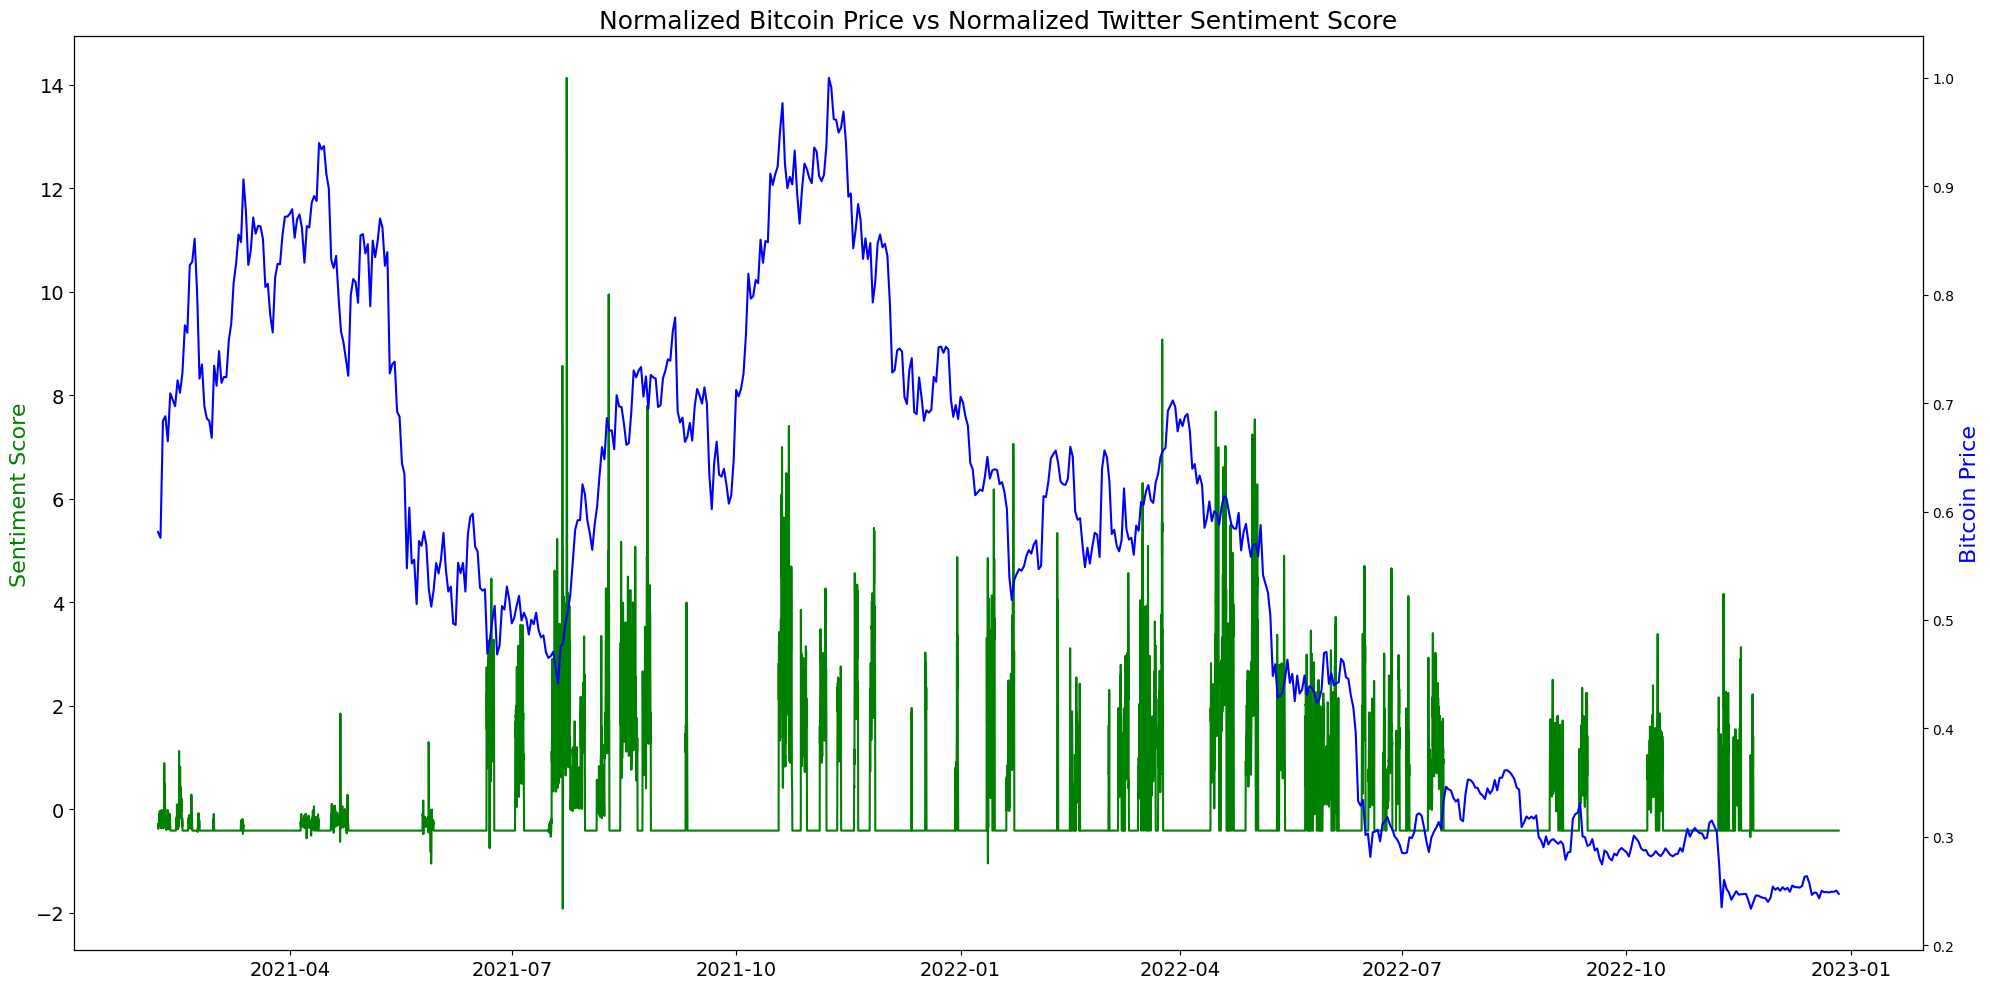

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 정규화 (Normalization)
scaler = StandardScaler()

# 트윗 점수 정규화
tweets_hourly['normalized_score'] = scaler.fit_transform(tweets_hourly['score'].values.reshape(-1, 1))

# 비트코인 가격 데이터 정규화
crypto_daily_avg['normalized_price'] = crypto_daily_avg['Close'] / max(crypto_daily_avg['Close'].max(), abs(crypto_daily_avg['Close'].min()))

# 시각화
fig, ax1 = plt.subplots(figsize=(20, 10))

# 제목 및 스타일 설정
ax1.set_title("Normalized Bitcoin Price vs Normalized Twitter Sentiment Score", fontsize=18)
ax1.tick_params(labelsize=14)

# 트윗 점수 시각화 (녹색)
ax1.plot(tweets_hourly.index, tweets_hourly['normalized_score'], 'g-', label='Normalized Sentiment Score')
ax1.set_ylabel("Sentiment Score", color='g', fontsize=16)

# 비트코인 가격 시각화 (파란색)
ax2 = ax1.twinx()
ax2.plot(crypto_daily_avg.index, crypto_daily_avg['normalized_price'], 'b-', label='Normalized Bitcoin Price')
ax2.set_ylabel("Bitcoin Price", color='b', fontsize=16)

# 그래프 표시
fig.tight_layout()
plt.show()
